#Exploración de datos

In [24]:
!pip install text_hammer

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from tqdm import tqdm
import text_hammer as th
import nltk
from nltk.corpus import stopwords

In [26]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Proyecto/disaster_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Deep Learning/Proyecto/disaster_test.csv")
print('Training Set Shape = {}'.format(df_train.shape))
print('Test Set Shape = {}'.format(df_test.shape))

Training Set Shape = (7613, 5)
Test Set Shape = (3263, 4)


In [29]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [30]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [31]:
df_train["length"] = df_train["text"].apply(lambda x : len(x))
df_test["length"] = df_test["text"].apply(lambda x : len(x))

print("Train Length Stat")
print(df_train["length"].describe())
print()

print("Test Length Stat")
print(df_test["length"].describe())

Train Length Stat
count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

Test Length Stat
count    3263.000000
mean      102.108183
std        33.972158
min         5.000000
25%        78.000000
50%       109.000000
75%       134.000000
max       151.000000
Name: length, dtype: float64


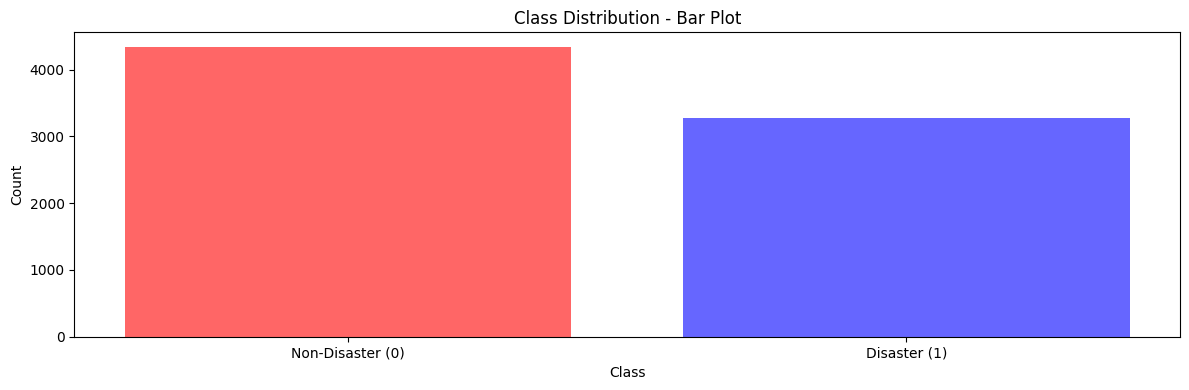

In [32]:
target_counts = df_train['target'].value_counts()

fig, axes = plt.subplots(1, 1, figsize=(12, 4))

axes.bar(target_counts.index, target_counts.values, color=['red', 'blue'], alpha=0.6)
axes.set_xticks(target_counts.index)
axes.set_xticklabels(['Non-Disaster (0)', 'Disaster (1)'])
axes.set_xlabel('Class')
axes.set_ylabel('Count')
axes.set_title('Class Distribution - Bar Plot')


plt.tight_layout()
plt.show()

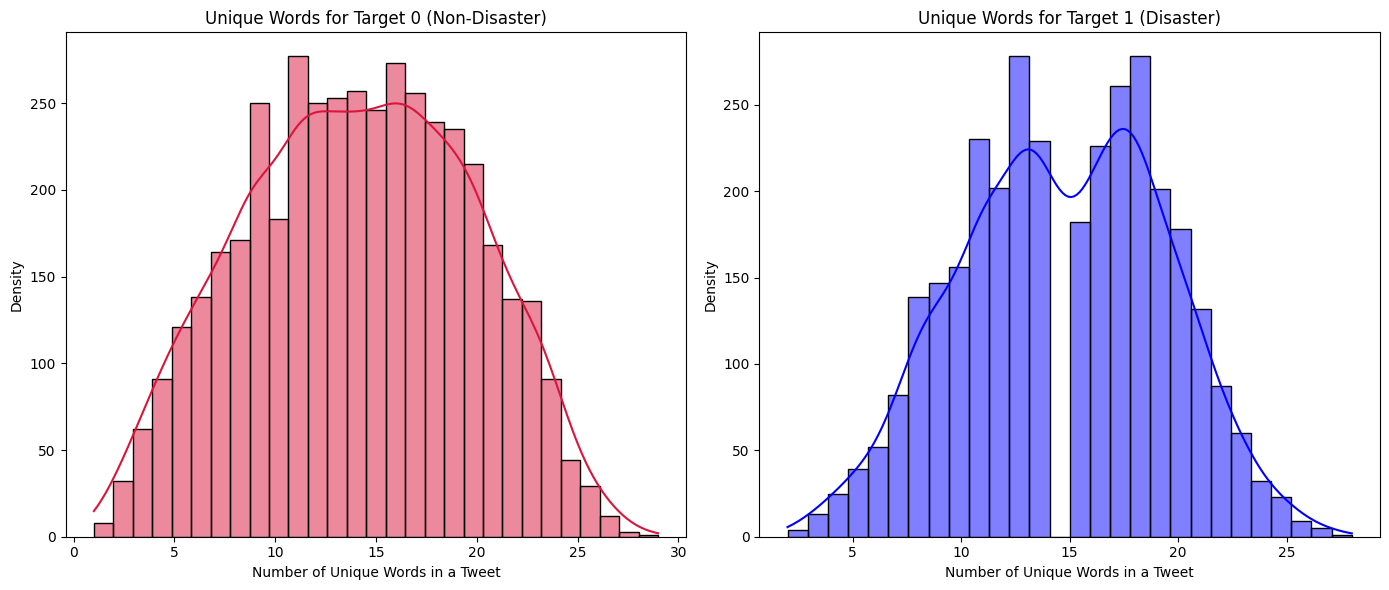

In [33]:
target_0_text = df_train[df_train['target'] == 0]['text']
target_1_text = df_train[df_train['target'] == 1]['text']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

def create_unique_words_histogram(text, target_name, ax):
    unique_words = text.str.split().apply(set).apply(len)
    sns.histplot(unique_words, kde=True, color='blue' if target_name == '1 (Disaster)' else 'crimson', ax=ax)
    ax.set_xlabel('Number of Unique Words in a Tweet')
    ax.set_ylabel('Density')
    ax.set_title(f'Unique Words for Target {target_name}')

create_unique_words_histogram(target_0_text, '0 (Non-Disaster)', ax1)
create_unique_words_histogram(target_1_text, '1 (Disaster)', ax2)

plt.tight_layout()
plt.show()

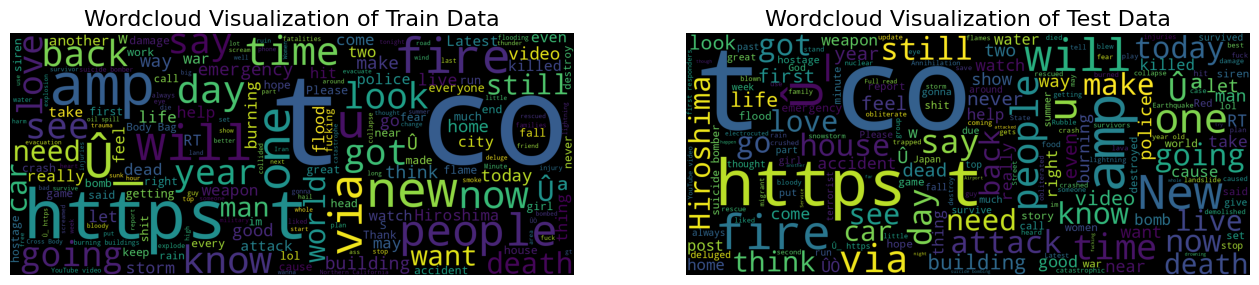

In [34]:
def generate_and_display_wordcloud(data, title, ax):
    wordcloud = WordCloud(width=1400, height=600, background_color='black').generate(''.join(text for text in data['text']))

    ax.imshow(wordcloud)
    ax.set_title(f'Wordcloud Visualization of {title}', fontsize=16)
    ax.axis('off')

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

generate_and_display_wordcloud(df_train, 'Train Data', axs[0])
generate_and_display_wordcloud(df_test, 'Test Data', axs[1])

plt.show()

#Después de Limpieza

In [36]:
def clean_dataset(dataframe, column):
  tqdm.pandas()
  dataframe[column] = dataframe[column].progress_apply(lambda x:str(x).lower())
  dataframe[column] = dataframe[column].progress_apply(lambda x: th.remove_urls(x))
  dataframe[column] = dataframe[column].progress_apply(lambda x: th.remove_html_tags(x))
  dataframe[column] = dataframe[column].progress_apply(lambda x: re.sub("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", "", x))
  dataframe[column] = dataframe[column].progress_apply(lambda x: ' '.join(x.split()))

  return dataframe


In [37]:
df_train = clean_dataset(df_train, 'text')
df_test = clean_dataset(df_test, 'text')


100%|██████████| 3263/3263 [00:00<00:00, 277691.26it/s]


In [39]:
stop = stopwords.words("english")
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

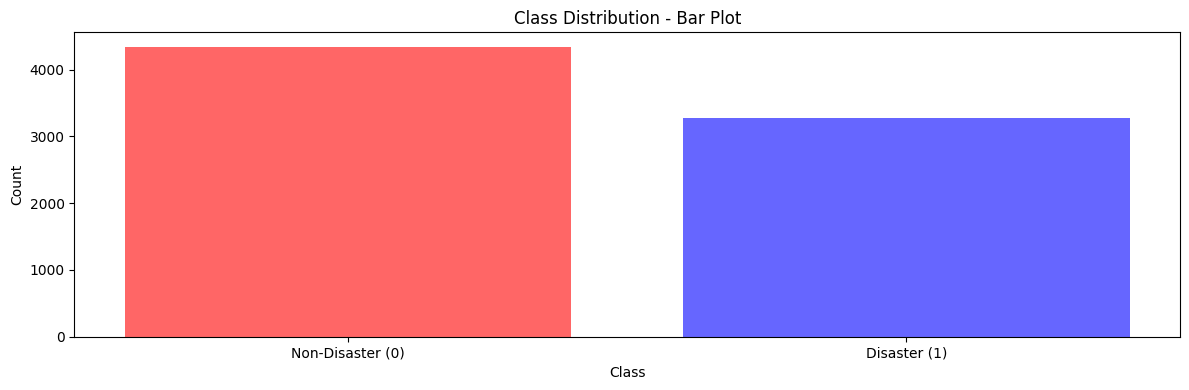

In [40]:
target_counts = df_train['target'].value_counts()

fig, axes = plt.subplots(1, 1, figsize=(12, 4))

axes.bar(target_counts.index, target_counts.values, color=['red', 'blue'], alpha=0.6)
axes.set_xticks(target_counts.index)
axes.set_xticklabels(['Non-Disaster (0)', 'Disaster (1)'])
axes.set_xlabel('Class')
axes.set_ylabel('Count')
axes.set_title('Class Distribution - Bar Plot')


plt.tight_layout()
plt.show()

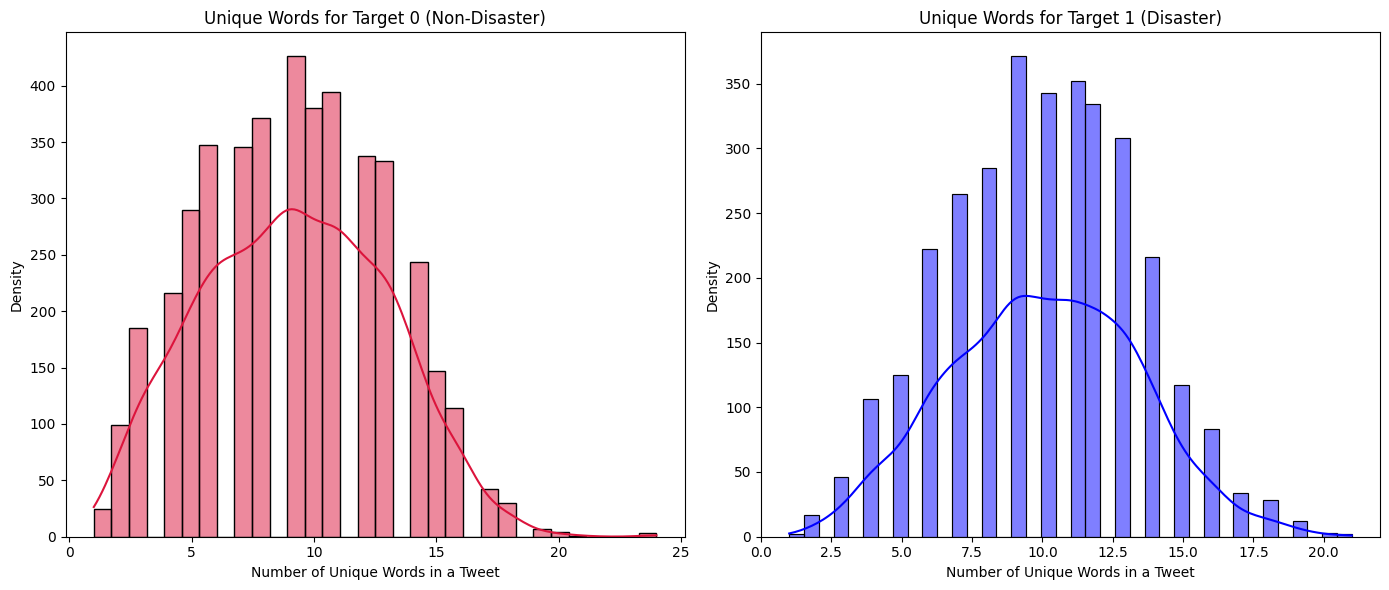

In [41]:
target_0_text = df_train[df_train['target'] == 0]['text']
target_1_text = df_train[df_train['target'] == 1]['text']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

create_unique_words_histogram(target_0_text, '0 (Non-Disaster)', ax1)
create_unique_words_histogram(target_1_text, '1 (Disaster)', ax2)

plt.tight_layout()
plt.show()

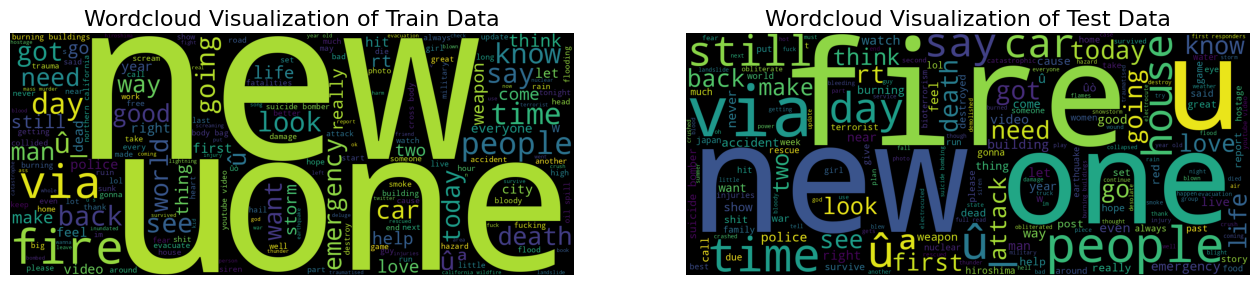

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

generate_and_display_wordcloud(df_train, 'Train Data', axs[0])
generate_and_display_wordcloud(df_test, 'Test Data', axs[1])

plt.show()